In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import random

N   = 1000
aux = frange(-1,1,0.001)
x   = np.random.choice(aux, N, replace = True)
y   = np.random.choice(aux, N, replace = True)
z   = np.random.choice(aux, N, replace = True)

# vx  = np.random.choice(aux, N, replace = True)
# vy  = np.random.choice(aux, N, replace = True)
# vz  = np.random.choice(aux, N, replace = True)

x = x*100
y = y*100
z = z*100

r = np.sqrt(x**2 + y**2 + z**2)

mask, = np.where(r<100)

x = x[mask]
y = y[mask]
z = z[mask]

# vx = vx*400 + 100
# vy = vy*400 + 100
# vz = vz*400 + 100

vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)

vx = vx[mask]
vy = vy[mask]
vz = vz[mask]

(-150, 150)

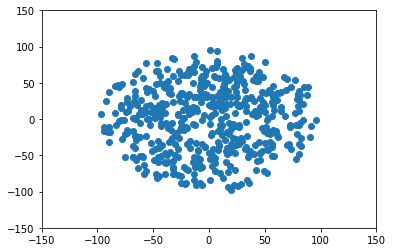

In [3]:
plt.plot(x,y,'o')
plt.xlim(-150,150)
plt.ylim(-150,150)

In [4]:
m = np.ones(len(x))*5e11
m = m/len(m)
print len(m)

515


In [5]:
pos = np.ndarray([len(m),3])
pos[:,0] = x
pos[:,1] = y
pos[:,2] = z

vel = np.ndarray([len(m),3])

vel[:,0] = vx
vel[:,1] = vy
vel[:,2] = vz

In [27]:
k1 = vel
print vel
print k1

k2 = vel + 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


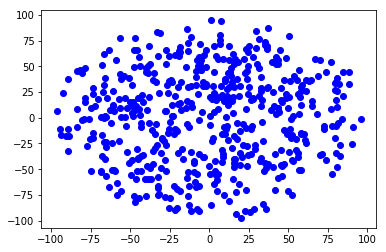

In [6]:
plt.plot(pos[:,0],pos[:,1],'o',color='b')

In [7]:
import aceleraciones as ac
eps = 0.5
acel = ac.aceleraciones(eps,pos[:,0],pos[:,1],pos[:,2],m)
#print a

In [8]:
import runge
dt = 0.01
nit = 100
    
posf,velf,acf = runge.rungek(eps,dt,nit,m,pos,vel,acel)

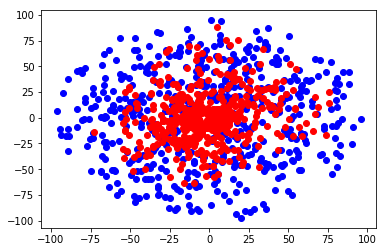

In [9]:
plt.plot(x,y,'o',color='b')
plt.plot(posf[:,0],posf[:,1],'o',color='r')

In [10]:
import energia_potencial as ep

Ui = ep.epot(eps,x,y,z,m)
Ki = 0.5*m*(vx**2 + vy**2 + vz**2)

Ei = Ki - Ui

In [12]:
import energia_potencial as ep

Ef = np.zeros(nit/10)
path = '/home/users/valeria/metodos_numericos/_data/runge/'
k=0
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    
    Uf = ep.epot(eps,posf[:,0],posf[:,1],posf[:,2],m)
    Kf = 0.5*m*(velf[:,0]**2 + velf[:,1]**2 + velf[:,2]**2)

    E = Kf - Uf
    Ef[k] = np.sum(E)
    k += 1

In [13]:
dE = np.zeros(len(Ef)-1)

for i in np.arange(len(Ef)-1):
    dE[i] = (Ef[i+1] - Ef[i])/abs(Ef[i+1])

print dE

[ 0.99344914  0.70655139  0.50176398  0.44450681  0.40297185  0.44934998
  0.52641615  0.64659797 -1.3597    ]


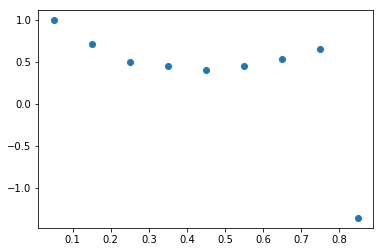

In [14]:
time = dt*np.arange(5,nit-5,10)
plt.plot(time,dE,'o')